In [15]:

import pandas as pd
import get_data
import annotations as annot
import constants as const
import importlib
importlib.reload(get_data)
importlib.reload(annot)
importlib.reload(const)
from python_speech_features import mfcc, delta
import numpy as np
from spafe.utils import vis
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile

In [28]:
get_data_whale = get_data.GetDataBase(
    location_of_wav_file=const.BOWHEAD_WAV_B,
    location_of_annotations=const.BOWHEAD_LABELS_B,
    annotations=annot.AnnotationsAudacity(),
    window_length=0.025, frame_step=0.01, samples=False)

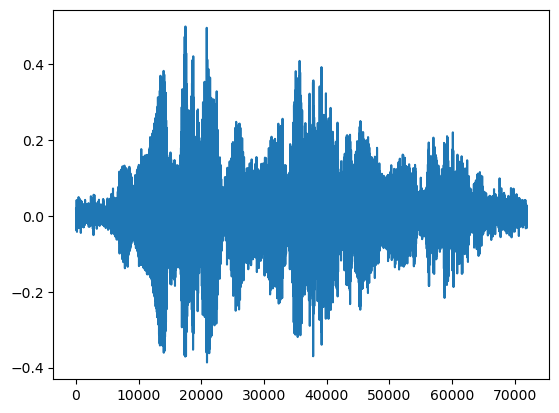

In [29]:
# view annots
audio = get_data_whale.audio
label = get_data_whale.annotations.annotations[5]
plt.plot(audio[label.start:label.end])

In [30]:
## create new folder with annotations in, this can then be used normally in ads

annotations = get_data_whale.annotations.annotations
audio = get_data_whale.get_audio()
whale_calls = []
fs = get_data_whale.fs
for i in range(len(annotations)):
    a = annotations[i]
    whale_call = audio[a.start:a.end]
    whale_calls.append(whale_call)

# IPython.display.Audio(whale_calls[100], rate=get_data_whale.fs)

In [31]:
# save whale calls

for i in range(len(whale_calls)):
    wavfile.write(str(i + 7) + '_bowhead_whale.wav',rate=fs,data=whale_calls[i])

In [26]:
# mean length of calls
lengths = []
for i in range(len(whale_calls)):
    lengths.append(len(whale_calls[i]) * 1/fs)

In [27]:
np.mean(lengths)

2.951992225461613